# Game Statistics in the NFL
 Drew Topoly, andrew.topoly@colorado.edu


**Introduction**

In any sport, understanding the nuances of home-field advantage is a pursuit that has intrigued fans, analysts, and statisticians for decades. One simple way to evaluate the effectiveness of home-field advantage is looking at the score differential for every game throughout the season. Evaluating the differential can be useful in determining whether teams truly have a great advantage when playing at home.

**Goal of the Project**

Is home field advantage actually a thing? Is there an effective way to show this soely based off results from the previous season?

**About the Dataset**

This dataset contains many metrics that involve team and QB ratings throughout the 2022 NFL season. Many of the numbers in this dataset are elo ratings of teams and QBs. Elo rating is a method for calculating the relative skill levels of players. The metrics in the dataset include: date, week, year, teams playing, QB names, score of the game, etc.

Source: https://github.com/dtopoly/Final-Project-Report/blob/main/nfl_elo_latest.csv


In [30]:
import pandas as pd
nfl_data = pd.read_csv('nfl_elo_latest.csv')

print(nfl_data)

          date  week  season  neutral  playoff team1 team2     elo1_pre  \
0     9/8/2022   1.0  2022.0      0.0      NaN   LAR   BUF  1614.761436   
1    9/11/2022   1.0  2022.0      0.0      NaN   MIA    NE  1539.979483   
2    9/11/2022   1.0  2022.0      0.0      NaN   CIN   PIT  1558.193285   
3    9/11/2022   1.0  2022.0      0.0      NaN   ATL    NO  1436.671709   
4    9/11/2022   1.0  2022.0      0.0      NaN   NYJ   BAL  1364.983381   
..         ...   ...     ...      ...      ...   ...   ...          ...   
279        NaN   NaN     NaN      NaN      NaN   NaN   NaN          NaN   
280        NaN   NaN     NaN      NaN      NaN   NaN   NaN          NaN   
281        NaN   NaN     NaN      NaN      NaN   NaN   NaN          NaN   
282        NaN   NaN     NaN      NaN      NaN   NaN   NaN          NaN   
283        NaN   NaN     NaN      NaN      NaN   NaN   NaN          NaN   

        elo2_pre  elo_prob1  ...  qb2_game_value  qb1_value_post  \
0    1614.246762   0.593181  ..

# Visualization 1: Home vs Away Win Probability
This visualization shows the win probability of a specific team of home games and away games throughout the season.

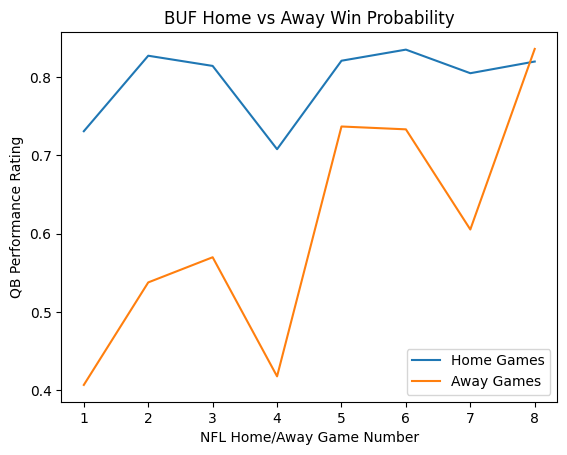

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

nfl_data = pd.read_csv('nfl_elo_latest.csv')

# Only uses at team code and QB values
nfl_data = nfl_data[['team1', 'team2', 'elo_prob1', 'elo_prob2']]

# Change team code to see different results
team_code = 'BUF'

# Finds the QB value of the specified team
home_value = nfl_data.loc[nfl_data['team1'] == team_code, 'elo_prob1']
away_value = nfl_data.loc[nfl_data['team2'] == team_code, 'elo_prob2']

# Finds the number of home and away games
home_count = home_value.count()
away_count = away_value.count()

home_games = list(range(1,home_count + 1))
away_games = list(range(1,away_count + 1))

# Plot line graph
plt.plot(home_games, home_value, label = 'Home Games')
plt.plot(away_games, away_value, label = 'Away Games')

plt.xlabel('NFL Home/Away Game Number')
plt.ylabel('QB Performance Rating')
plt.title(team_code + ' Home vs Away Win Probability')

plt.legend()
plt.show()

# Visualization 2: Home vs Away QB Performance Rating
This visualization shows how the performance rating of a QB of a specific team trends throughout the season between home and away games.

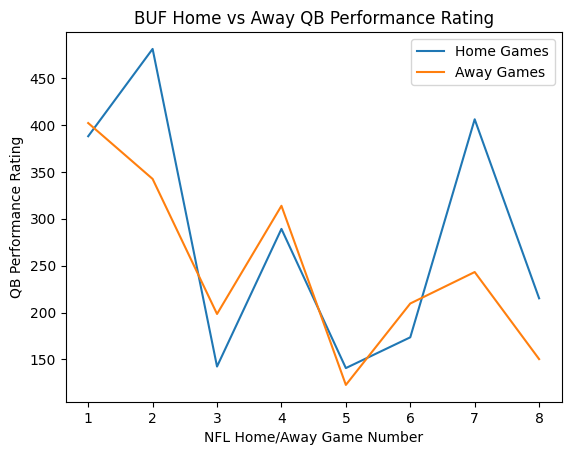

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

nfl_data = pd.read_csv('nfl_elo_latest.csv')

# Only uses at team code and QB values
nfl_data = nfl_data[['team1', 'team2', 'qb1_game_value', 'qb2_game_value']]

# Change team code to see different results
team_code = 'BUF'

# Finds the QB value of the specified team
home_value = nfl_data.loc[nfl_data['team1'] == team_code, 'qb1_game_value']
away_value = nfl_data.loc[nfl_data['team2'] == team_code, 'qb2_game_value']

# Finds the number of home and away games
home_count = home_value.count()
away_count = away_value.count()

home_games = list(range(1,home_count + 1))
away_games = list(range(1,away_count + 1))

# Plot line graph
plt.plot(home_games, home_value, label = 'Home Games')
plt.plot(away_games, away_value, label = 'Away Games')

plt.xlabel('NFL Home/Away Game Number')
plt.ylabel('QB Performance Rating')
plt.title(team_code + ' Home vs Away QB Performance Rating')

plt.legend()
plt.show()

# Analysis: Home vs Away Score Differential
This visualization shows the differntial between every home and away game each week. On average, home teams score more each week than away teams.

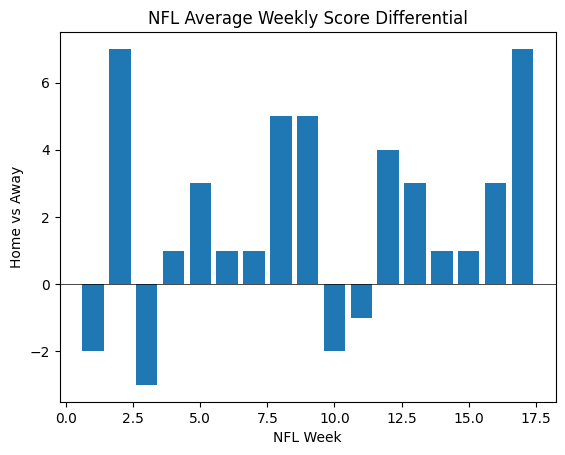

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

nfl_data = pd.read_csv('nfl_elo_latest.csv')

# Only uses the week and scores of each game
nfl_data = nfl_data[['week', 'score1','score2']]

# Removes the post-season
week = nfl_data[nfl_data['week'] < 18]

i = 1
j = 1
home_total = 0
away_total = 0
home_list =[]
away_list = []

# Finds the mean home score of each NFL week
while i < 18:
  home_score_mean = week.loc[week['week'] == i, 'score1'].mean()
  home_total += home_score_mean
  home_list.append(round(home_score_mean, 0))
  i += 1

# Average of Home Scores
total_home_score_mean = round(home_total/17, 0)

# Finds the mean away score for each NFL week
while j < 18:
  away_score_mean = week.loc[week['week'] == j, 'score2'].mean()
  away_total += away_score_mean
  away_list.append(round(away_score_mean, 0))
  j += 1

# Average of Away Scores
total_away_score_mean = round(away_total/17, 0)

# Calculates the differential of home and away games
average_score_data = {'Home Scores': home_list, 'Away Scores': away_list}
score_data = pd.DataFrame(average_score_data)
score_data['Differential'] = score_data['Home Scores'] - score_data['Away Scores']
plot_data = score_data['Differential']

week_summary = list(range(1,18))

# Plot bar graph
plt.bar(week_summary, plot_data)

plt.axhline(0, color='black', linewidth=0.5)

plt.xlabel('NFL Week')
plt.ylabel('Home vs Away')
plt.title('NFL Average Weekly Score Differential')

plt.show()

**Conclusion and Biases**

From the analysis of the point differential, it can be determined that the idea of home-field advantage does have an affect on the out come of games.

Some possible biases in this data include sample size, schedule strength, time of year, weather, injury, psychological bias, and refereeing.